# Project: Stock Data Analysis, Visualization and Prediction

## Stock Market Data From Google Finance


# Introduction

This project is extended version and more detail version of stock data analysis. Stock Market Analysis, Visualization, and Prediction is the project on technical analysis, visualization and prediction of the available stock data. The stock dat are pulled from google finance using Pandas. By looking at the stocks of some big Tech Companies, we will try to identify the trend in stock, if any and try to see how the stock prices are moving over the time. The MonteCarlo Simulation is applied to predict the future stock prices. 

## Questions 
The question we are trying to answer here are:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior
    

# 1.  Data Extraction and Processing

In [3]:
#importing the necessary library
#library to extract and pre-process data
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from pandas_datareader import DataReader #for reading stock data from yahoo
from datetime import datetime # for time stamps
#Library to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
get_ipython().magic('matplotlib inline') # to visualize the plot in notebook


In [4]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN'] #list of big tech companies we want to explore
end = datetime.now() #01/15/2019 time
#setting up the date to extract data upto the present day from a year before
start = datetime(end.year-1, end.month,end.day) 

In [5]:
#extracting data from the yahoo finance
for stock in tech_list:
    globals()[stock]= DataReader(stock,'yahoo',start, end)

In [6]:
#lets check the data we just extracted.
print('####### Stock Data Sample for APPLE #####')
print(AAPL.head())

print('######  Stock Data Sample for GOOGLE ######')
print(GOOGL.head())    

print('####### Stock Data Sample for AMAZON #####')
print(AMZN.head())

print('######  Stock Data Sample for MICROSOFT ######')
print(MSFT.head()) 

####### Stock Data Sample for APPLE #####
                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-02-02  166.800003  160.100006  166.000000  160.500000  86593800.0   
2018-02-05  163.880005  156.000000  159.100006  156.490005  72738500.0   
2018-02-06  163.720001  154.000000  154.830002  163.029999  68243800.0   
2018-02-07  163.399994  159.070007  163.089996  159.539993  51608600.0   
2018-02-08  161.000000  155.029999  160.289993  155.149994  54390500.0   

             Adj Close  
Date                    
2018-02-02  158.126022  
2018-02-05  154.175354  
2018-02-06  160.618591  
2018-02-07  157.180222  
2018-02-08  152.855148  
######  Stock Data Sample for GOOGLE ######
                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-02-02  1131.300049  1111.170044  1127.420044  1119.199951  589210

# Lets analyze and visualize the data for APPLE 

In [7]:
AAPL.describe() #gives the discription of the data, its distribution and other statistical metrics 

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.349602,185.434064,187.387371,187.388566,3.462949e+07,186.348620
std,22.513517,22.421043,22.468171,22.494540,1.509549e+07,22.528107
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,142.190002
25%,173.089996,168.800003,170.785004,170.500000,2.373465e+07,169.325768
50%,187.399994,184.940002,186.289993,186.050003,3.189860e+07,185.013336
75%,209.375000,205.784996,207.320000,207.760002,4.092405e+07,206.783493
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [8]:
AAPL.info() # provides the information about the data type for the attributes in the dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-02-02 to 2019-02-01
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


Since, we have seen the data, now lets see how they have been behaving through out the year. Lets plot the volume and closing price of apple stcks 

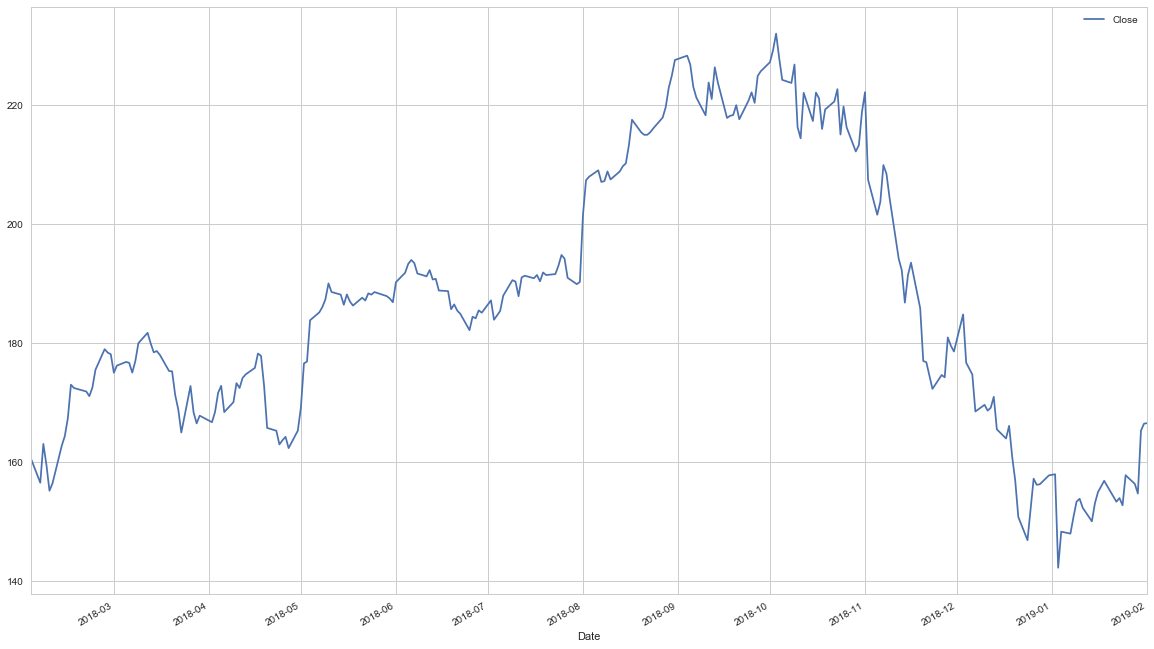

In [9]:
AAPL['Close'].plot(legend = True, figsize = (20,12)) 
#figsize as name suggest is the size of the plot we want to display

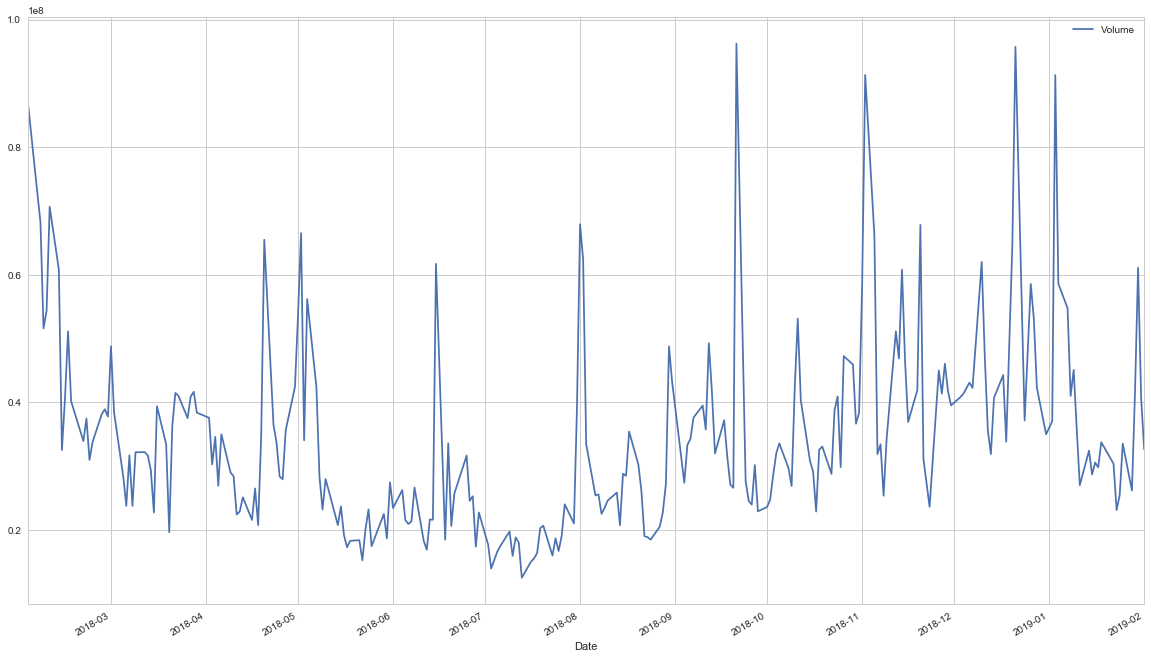

In [10]:
AAPL['Volume'].plot(legend = True, figsize = (20,12))

from this two visualization we can say the the price was at highest peak during month of october in 2018 and and started declining begining of the november, 2018. Also, During the same time we can see high fluctuation in share volume. However, we can see similar fluctuation during other period of time through out the year. 

Now that we have understood the behaviour of stock through out the last year, lets go ahead and calculate the moving average for the Apple Stocks 

# Moving Average

"A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices." - Investopedia
Moving Average helps cut down the amount of noise in price chart. Lets visualize results and analyze it further


In [11]:
#pandas have built in rolling mean (moving avarage) calculator
#lets go ahead and plot out several moving avarage with different moving intervals 
intervals = [10,20,30,50,100]

for i in intervals:
    column_name = 'MA for %s days interval' %(str(i))
    AAPL[column_name]= pd.rolling_mean(AAPL['Close'],i)
    
    

C:\Users\Prakash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
C:\Users\Prakash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  import sys
C:\Users\Prakash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  import sys
C:\Users\Prakash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  import sys
C:\Users\Prakash\Anaconda3\lib\site-

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days interval,MA for 20 days interval,MA for 30 days interval,MA for 50 days interval,MA for 100 days interval
Date,,,,,,,,,,,
2018-02-02,166.800003,160.100006,166.000000,160.500000,86593800.0,158.126022,NaN,NaN,NaN,NaN,NaN
2018-02-05,163.880005,156.000000,159.100006,156.490005,72738500.0,154.175354,NaN,NaN,NaN,NaN,NaN
2018-02-06,163.720001,154.000000,154.830002,163.029999,68243800.0,160.618591,NaN,NaN,NaN,NaN,NaN
2018-02-07,163.399994,159.070007,163.089996,159.539993,51608600.0,157.180222,NaN,NaN,NaN,NaN,NaN
2018-02-08,161.000000,155.029999,160.289993,155.149994,54390500.0,152.855148,NaN,NaN,NaN,NaN,NaN


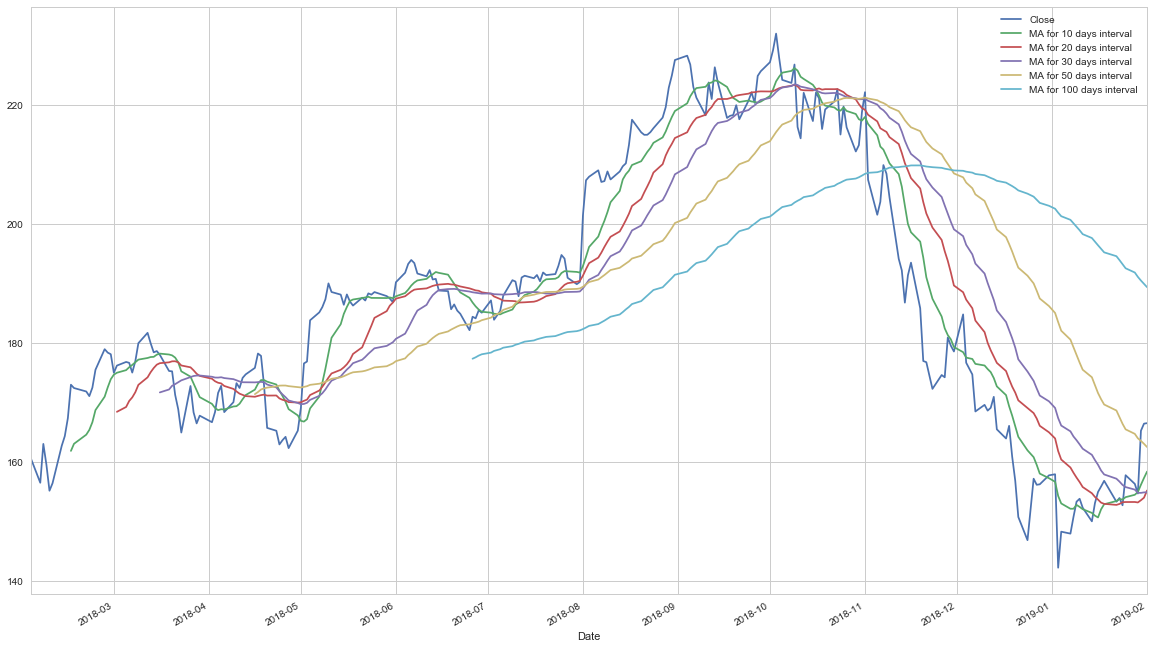

In [13]:
AAPL[['Close','MA for 10 days interval','MA for 20 days interval','MA for 30 days interval',
      'MA for 50 days interval','MA for 100 days interval']].plot(subplots=False,figsize=(20,12))

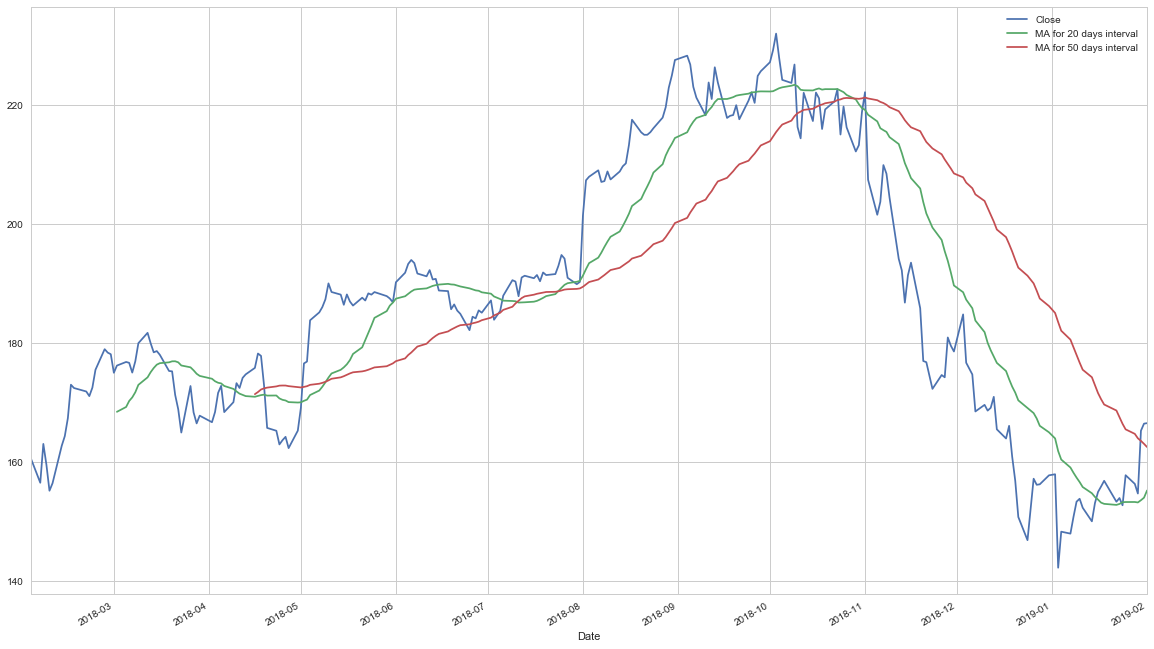

In [14]:
# let see with intervals 20 and 50 days to have better visualization 
AAPL[['Close','MA for 20 days interval',
      'MA for 50 days interval']].plot(subplots=False,figsize=(20,12))

Here we can cleary see the price and moving average line relationship. Consider the moving average line as trend line, so we can say the if the price line is above the trend line it is increasing else otherwise. 

# 2. Daily return analysis

Now that we have done some basic baseline analysis to visualize and understand the stock data. Lets go ahead and dive a little deeper. We are now going to analyze the risk associate to each stock
In order to do so, we need to take a closer look a the daily changes of stock and not just its absolute values. 
Lets go ahead and retrive the daily returns for AAPL stock

In [15]:
# a pandas library pct_change (percentage change) is applied to find the change in closing price 
AAPL['Daily Return'] = AAPL['Close'].pct_change()

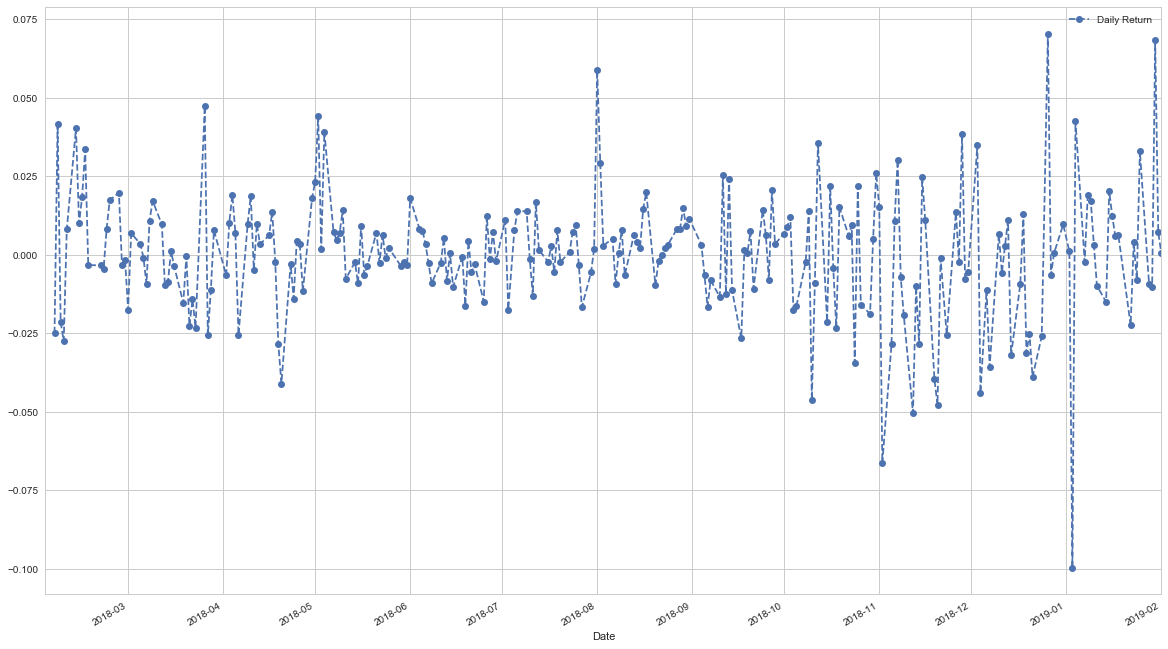

In [16]:
# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(20,12), legend=True, linestyle='--', marker='o')

Great !!!, now lets get an overall look at the average daily return using a histogram. By using seaborn to create both histogram and kde (kernel Density Estimation) plot on the same fugure

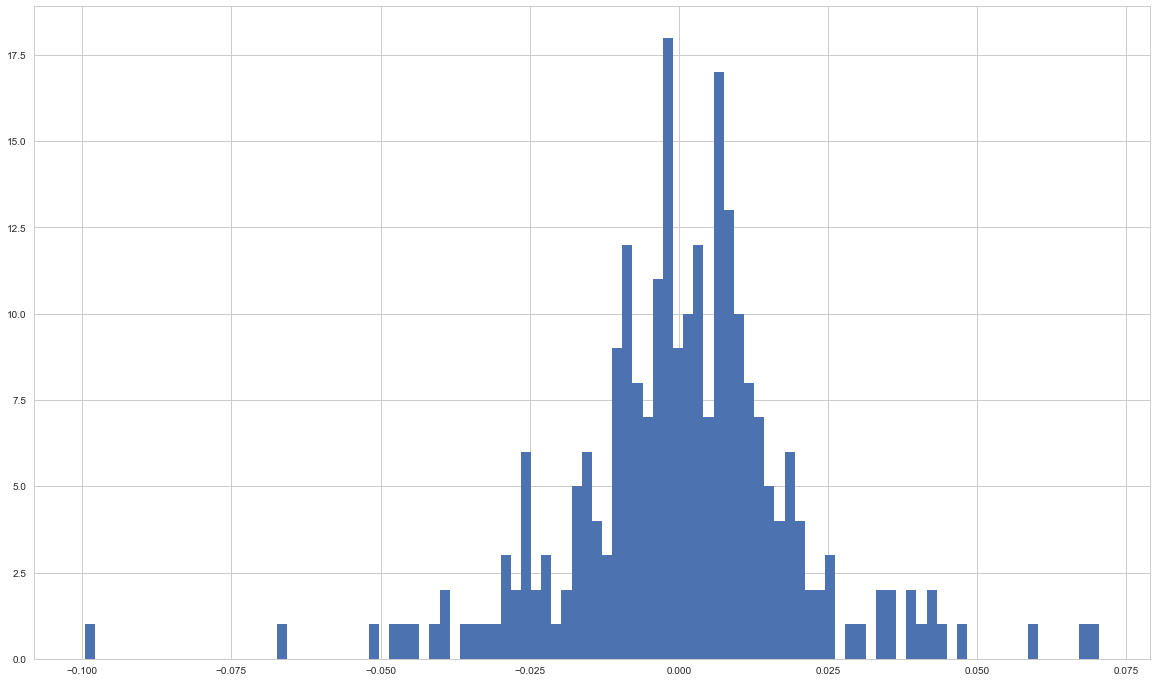

In [17]:
AAPL['Daily Return'].hist(bins= 100, figsize = (20,12))

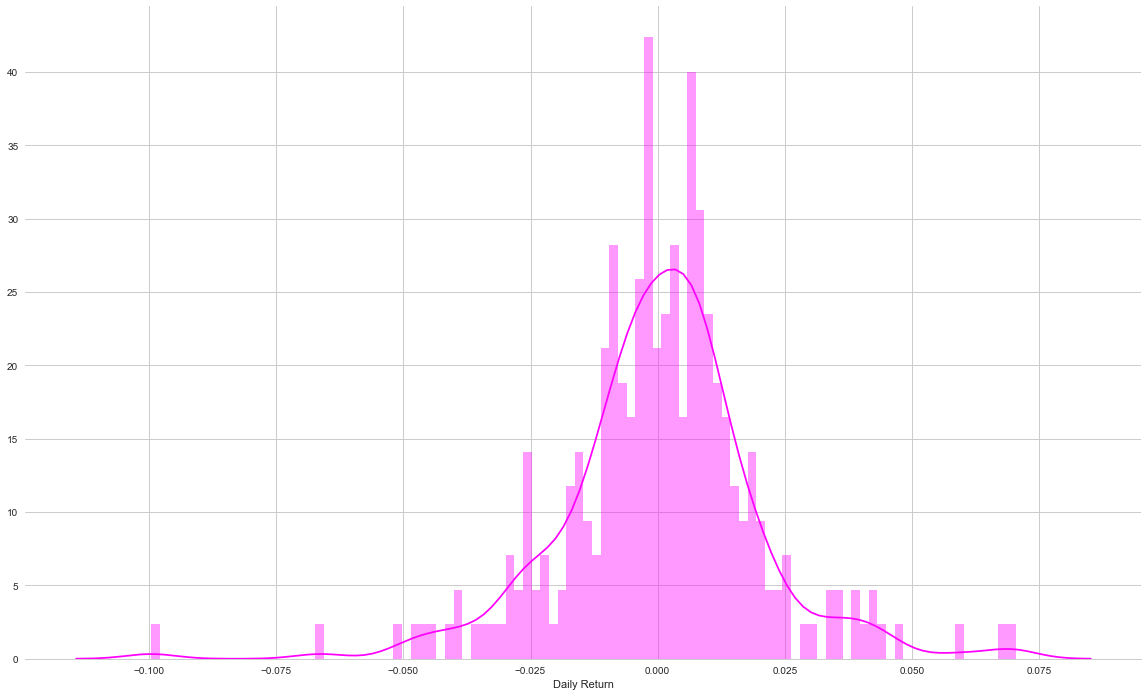

In [18]:
f, axes = plt.subplots(1, 1, figsize=(20, 12), sharex=True) #set up the matloptlib figure 
#(1,1 refers to numbers of figure in rows, column )
sns.despine(left=True)
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn


from this we can see how the daily returns has been distributed through out the year. 

## 2.1 Combined Analysis 

As, until now we have been analyzing the stock data for apple only, now what if we combine all the stock data for all the tech companies and analyze them

In [19]:
#Grab all the Closing Prices for the tech stock list into one data frame
closingprice_df = DataReader(tech_list,'yahoo',start,end)['Close']

In [20]:
closingprice_df.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-02-02,160.500000,1429.949951,1119.199951,91.779999
2018-02-05,156.490005,1390.000000,1062.390015,88.000000
2018-02-06,163.029999,1442.839966,1084.430054,91.330002
2018-02-07,159.539993,1416.780029,1055.410034,89.610001
2018-02-08,155.149994,1350.500000,1007.710022,85.010002


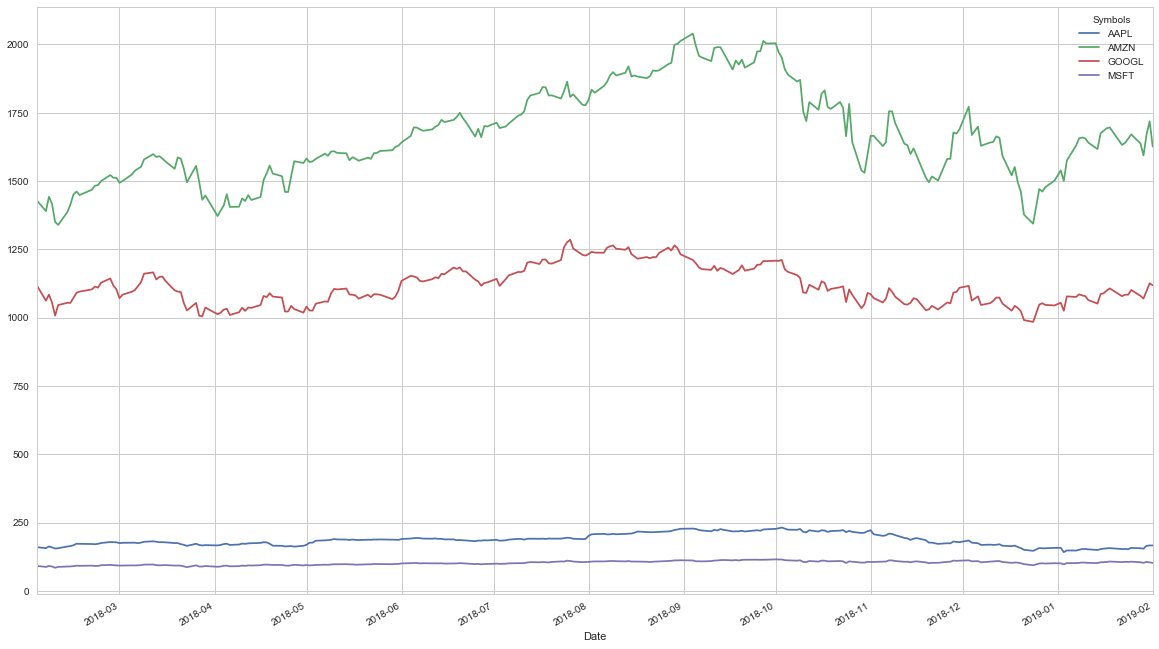

In [21]:
#lets visualise the data 
closingprice_df.plot(grid = True, legend = True, figsize = (20,12))

We can see that It is hard to visualize the microsoft and Apple stock data. We can create secondary axis for these two data 

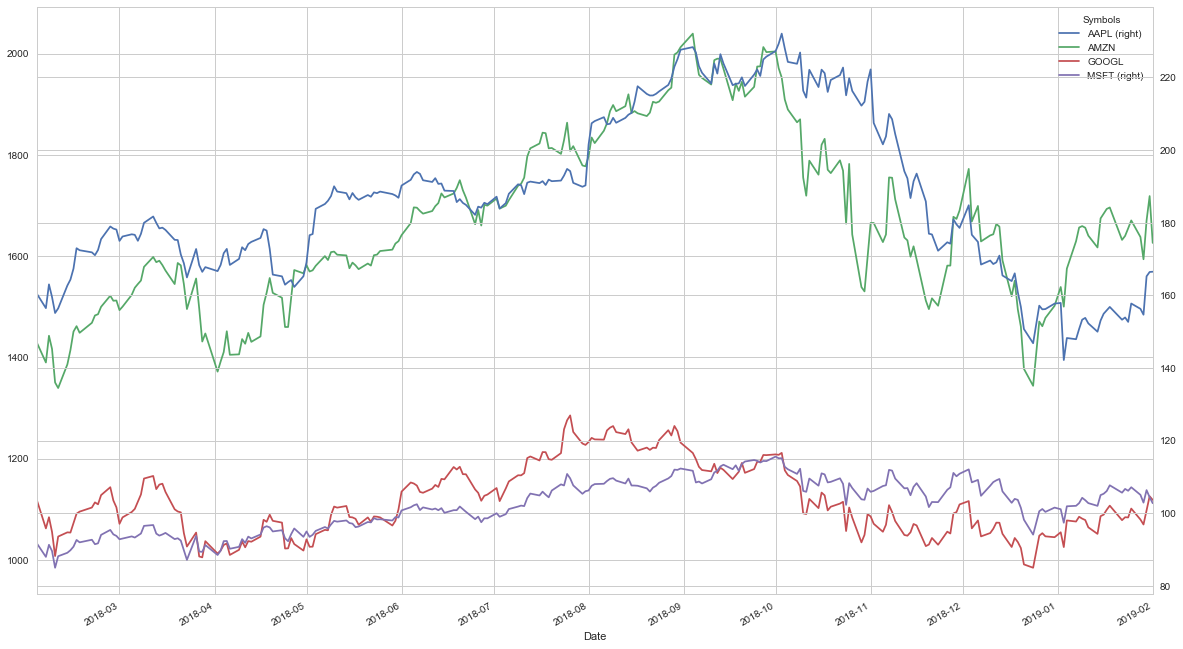

In [22]:
closingprice_df.plot(secondary_y = ['AAPL','MSFT'],grid = True, legend= True, figsize = (20,12))

Now, lets go ahead and get the daily returns for all the stocks and visualize the data

In [23]:
daily_return = closingprice_df.pct_change() #percentage change in daily prices 

In [24]:
daily_return.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-02-02,NaN,NaN,NaN,NaN
2018-02-05,-0.024984,-0.027938,-0.050759,-0.041185
2018-02-06,0.041792,0.038014,0.020746,0.037841
2018-02-07,-0.021407,-0.018062,-0.026761,-0.018833
2018-02-08,-0.027517,-0.046782,-0.045196,-0.051334


Now, we can compare the daily return of the tech stock and see how they are co-related. 

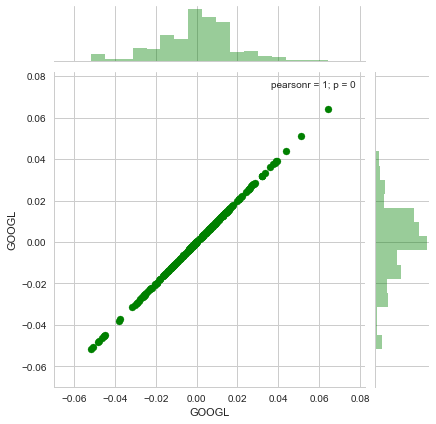

In [26]:
#comparing Amazon and google daily returns 
sns.jointplot('GOOGL','GOOGL',daily_return,kind='scatter',color='green',ratio=5, space = 0.2)
# this comparision gives us a standard corelated condition. if the daily returns two stocks are corelated 
#then their daily return value should perfectly lined up 

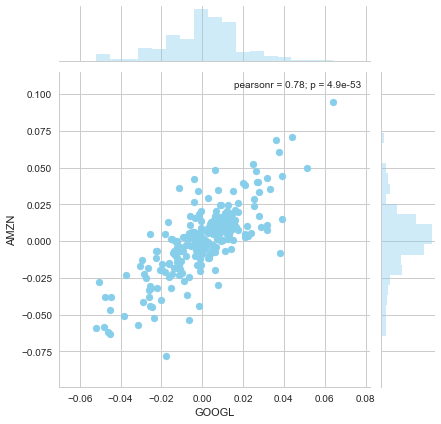

In [27]:
#comparing Amazon and google daily returns 
sns.jointplot('GOOGL','AMZN',daily_return,kind='scatter',color='skyblue',ratio=5, space = 0.2)

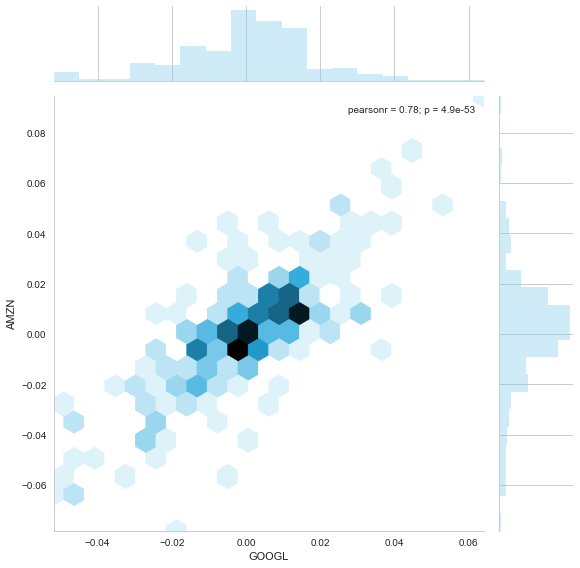

In [28]:
#comparing Amazon and google daily returns 
sns.jointplot('GOOGL','AMZN',daily_return,kind='hex',color='skyblue',size= 8, ratio=5, space = 0.2)

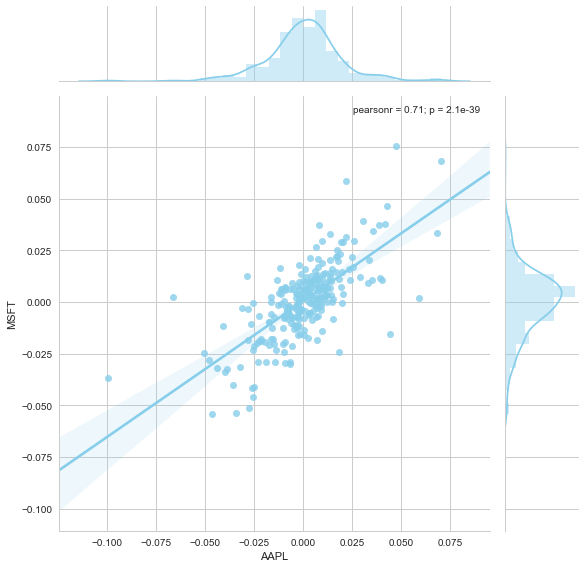

In [29]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',daily_return, kind='reg', size=8, color='skyblue')


In these visualization on top right corner, we can see Pearson Prduct-momment Corelation coefficient. This metrics can give you a sense of how corelated the daily percentage returns are. for the quice reference check the following figure

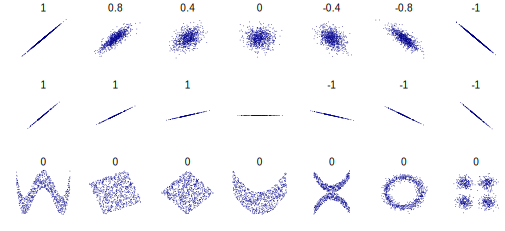

In [30]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

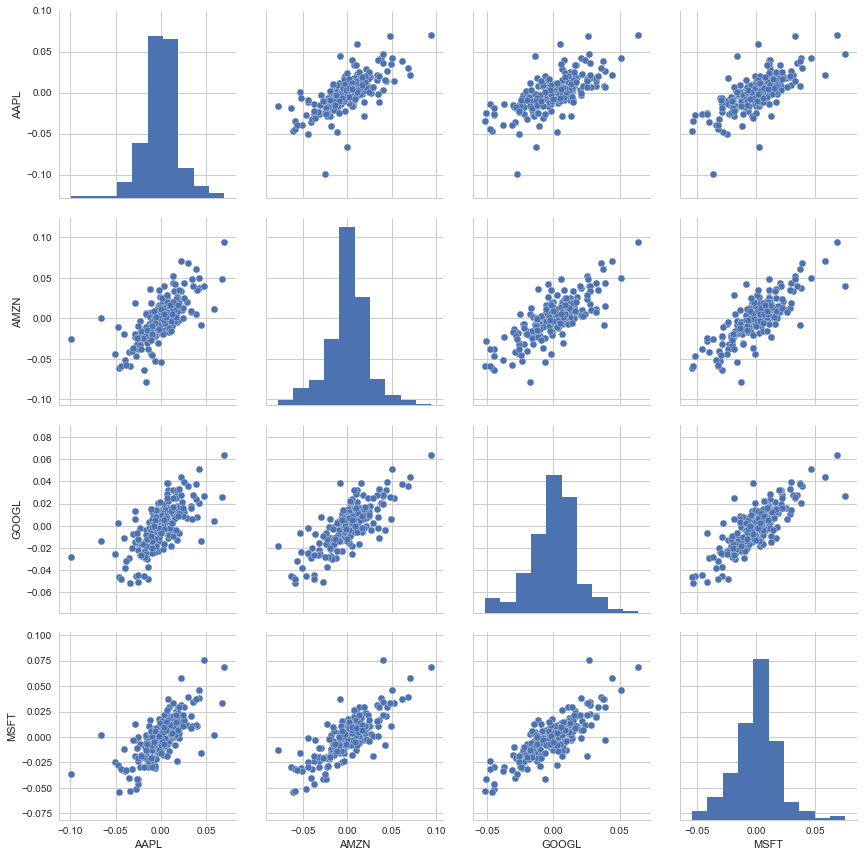

In [31]:
#Seaborn and pandas make it easy to plot and compare multiple combinations of company. we can use pairp;ot()
sns.pairplot(daily_return.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks, Some pair have interesting relation while other are not quite related. Here will futher analyze and dig deeper into the google and amazon stock price. 
while pairplot() might be simple and easy idea to visualize the data but for more details and control we can use PairGrid(). We can control what kind of plots goes to diagonal, the uppper traingle and the lower traingle


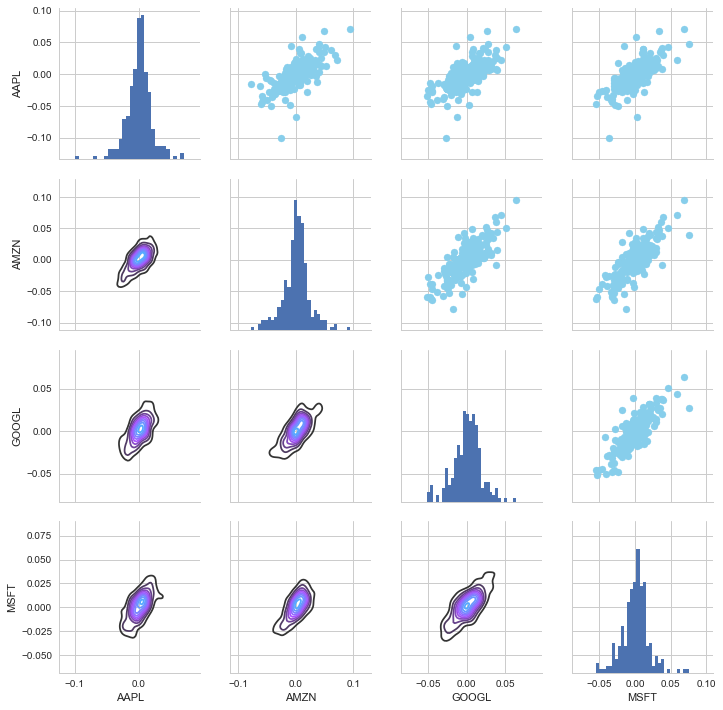

In [32]:
#first we need to set up the figure
return_fig = sns.PairGrid(daily_return.dropna())
#using map_upper we can specify the upper triangle plot
return_fig.map_upper(plt.scatter, color = 'skyblue')
#using map_lower we can control the lower traingle of the grid
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
#finally controlling the diagonal plot with map_diag
return_fig.map_diag(plt.hist, bins=30)

We can also analyze the co-relation of closing price using the same exact technique. We just need to change the data frame to closingprice_df from daily_return


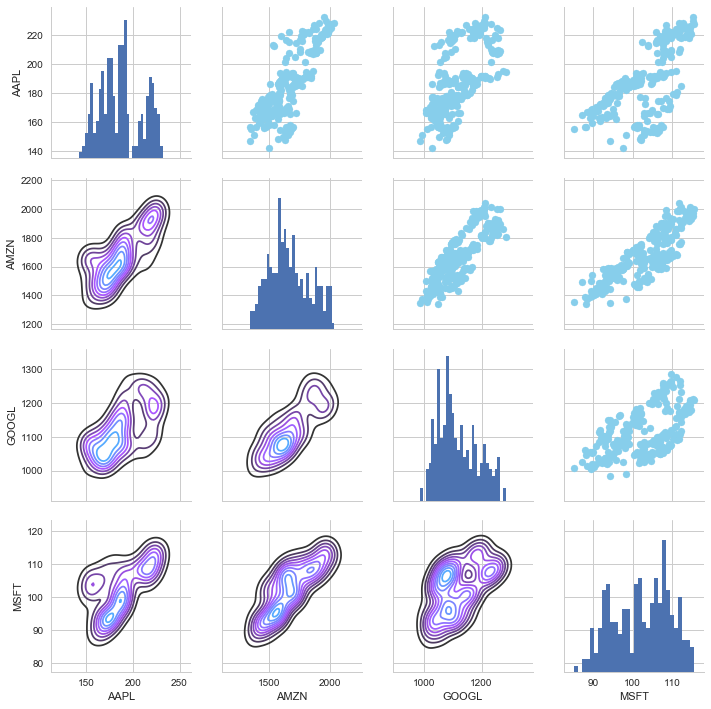

In [33]:
#first we need to set up the figure
closing_fig = sns.PairGrid(closingprice_df.dropna())
#using map_upper we can specify the upper triangle plot
closing_fig.map_upper(plt.scatter, color = 'skyblue')
#using map_lower we can control the lower traingle of the grid
closing_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
#finally controlling the diagonal plot 
#finally controlling the diagonal plot with map_diag
closing_fig.map_diag(plt.hist, bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Amazon stocks.

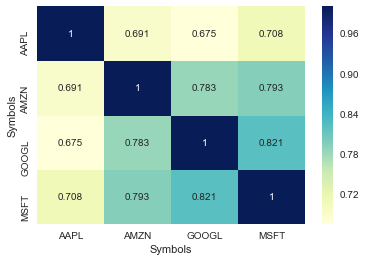

In [34]:
#now lets visualize the corelation using heat maps 
sns.heatmap(daily_return.corr(),annot = True, fmt = ".3g", cmap = 'YlGnBu')

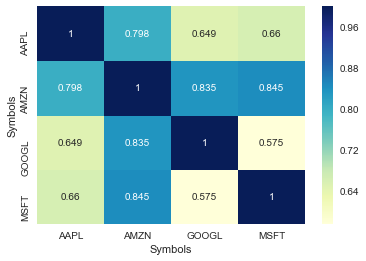

In [35]:
#lets do the same for the closing price
sns.heatmap(closingprice_df.corr(),annot = True, fmt = ".3g", cmap = 'YlGnBu')

Awesome!!! just like we suspected in our pair plots and grid plots we see numericall and visually that, Amazon and Microsoft had the strongest correlation of daily return. One more interesting fact are all tech companies are positively corelated. Interesting hmmmmm\

Great !!! Now we have dome some analysis on daily return and closing price. Lets see on risk part. 

# 3 Risk Analysis

Risk Management Measures includes 4 different methods.
### $1. Standard Deviation$
measures the dispersion of data from its expected values. High SD values means high fluctuation and less predictable
### $2. Beta$
This is amount of systematic risk an indivudual security has relative to whole stock market. The value fluctuates around 1, if its is more than one then the stock is volatile than the market and vice versa
### $3. Value at Risk (VAR)$
VAR is the statistical measure used to assess the level of Risk asoociated with a portfolio or company. if a company has a one year 10% Var of 5 million. It means the company has a 10 percent chance of losing more than 5 million over the 1 year period
### $4. Conditional VAR$
This is another statistical measure used as extension to VAR. The CVAR access the likelyhood , with certain degree of confidense. For example, suppose a risk manager believes the average loss on an investment is 10 million for the worst 1 percent of possible outcomes for a portfolio. Therefore, the conditional VaR, or expected shortfall, is $10 million for the 1 percent tail.


In [36]:
#lets start by defining a new DataFrame as a clean Version of the original Daily_return DataFrame
for_risk = daily_return.dropna()

In [37]:
for_risk.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-02-05,-0.024984,-0.027938,-0.050759,-0.041185
2018-02-06,0.041792,0.038014,0.020746,0.037841
2018-02-07,-0.021407,-0.018062,-0.026761,-0.018833
2018-02-08,-0.027517,-0.046782,-0.045196,-0.051334
2018-02-09,0.008121,-0.008071,0.038265,0.037290


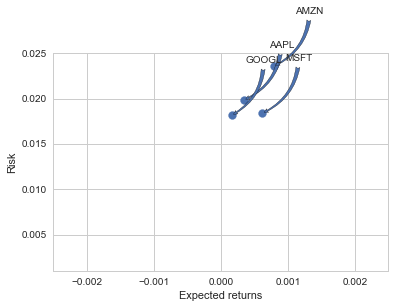

In [38]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(for_risk.mean(),for_risk.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(for_risk.columns, for_risk.mean(), for_risk.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

Now, by looking at the risk and expected returns we can say that theses stocks have lower risk and positive expected returns 

## Value at Risk

lets go ahead and define the value at risk parameter for our stocks.
We can trat Value at Risk (VaR) as the amount of money we could expect to lose (also known as putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk 
lets go ahead and see some of them in action

###### Value at risk using "Bootstrap" method 
For this method we will calculate the emperical quantiles from a histogram of daily returns. 
"n statistics and probability quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way" - wikipedia, a quartile is a quantile that divide the range of probability distribution into 4 parts. similarly decile does into 10 parts. 
for more info got to 
https://en.wikipedia.org/wiki/Quantile 

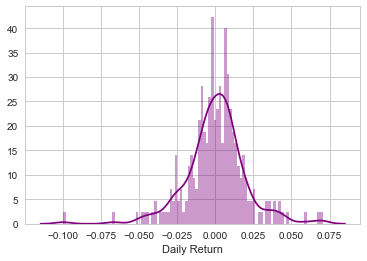

In [39]:
#let's go ahead and repeat the daily returns histogram for Apple stock
#note : Use dropna(), otherwise the NaN values cannot be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color = 'purple')

Now we can use quantile to get the risk value for the stock. The 0.05 emperical quantile of daile returns 


In [41]:
#For AAPL stocks
for_risk['AAPL'].quantile(0.05)

-0.029930166126229348

The 0.05 empirical quantile of daily returns is at -0.0299.
This means that with 95% of confidence, our worst daily loss will not exceed 2.9%.
If we have a 1 million dollar investment, our one-day 5% VaR is 0.0299 * 1,000,000 = $29,900.

In [45]:
#similarly for other stocks we can see 
print('For Amazon Stock the VaR is {}'.format(for_risk['AMZN'].quantile(0.05)))
print('For Microsoft Stock the VaR is {}'.format(for_risk['MSFT'].quantile(0.05)))
print('For Google Stock the VaR is {}'.format(for_risk['GOOGL'].quantile(0.05)))

For Amazon Stock the VaR is -0.042665872568177526
For Microsoft Stock the VaR is -0.029898125534400955
For Google Stock the VaR is -0.029345658433656014


##### Value at Risk using Monte Carlo Method
We will use Monte Carlo Method to run many trails with random market conditions, the we will calculate portfolio losses for each trial. After this, we will use the aggregation of all these simulations to establish how risky the stock is.



Let's start with a brief explanation of what we are going to do:
We will use the geometric Brownian Motion (GBM), which techically is known as Markov Process. 
This means that the stock pricec follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH).
"Past Price Information is already incorporated and the next price movement is 'Conditionally independent' of the past price movememnts"
This basically means that past information on the price of a stock is independent of where the stock price will be in future, meaning you can not perfectly predict the future solely based on the previous price of stock 


Now, we see that the change in the stock price is the current stock price multiplied by two terms . 
The first term is "drift" > which is the product  of avarage daily return and change in time.
the second term is "shock" > which will randomly push the stock price up or down. 
By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. 

for more info on the Monte Carlo for stocks and simulating stock prices with GBM models. check out following link
http://www.investopedia.com/articles/07/montecarlo.asp



In [46]:
#To demonstrate a basic monte carlo method
# we will start with just a few simulation 
#first we will define the variables 

for_risk.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-02-05,-0.024984,-0.027938,-0.050759,-0.041185
2018-02-06,0.041792,0.038014,0.020746,0.037841
2018-02-07,-0.021407,-0.018062,-0.026761,-0.018833
2018-02-08,-0.027517,-0.046782,-0.045196,-0.051334
2018-02-09,0.008121,-0.008071,0.038265,0.037290


In [47]:
#set up your time horizon 
days = 365
#set up delta
dt = 1/days


In [48]:
#now lets grab mu(meu) (drift) from the expected return data we got for GOOGL
mu = for_risk.mean()['GOOGL']

In [49]:
#now lets grab the volatility of the stock from std() of the average return for GOOGL
sigma = for_risk.std()['GOOGL']

now we will create a function that takes in the starting price and number of days and uses the sigma and mu we already calculated from our daily returns.

In [60]:
def stock_monte_carlo(start_price, days, mu, sigma):
    '''This function takes in starting stock price, days of simulation
    and returns the simulated price array'''
    
    #defne a price array
    price = np.zeros(days)
    price[0]= start_price
    
    #shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    dt = 1/days
    #Run price array for number of days 
    for x in range(1,days):
        #calculate shock
        shock[x] = np.random.normal(loc = mu *dt,scale = sigma*np.sqrt(dt))
        
        #calculate Drift = average daily return 
        drift[x] = mu * dt
        
        #calculate price
        price[x]= price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price
    

In [55]:
#now lets put the function to work
#for Google Stock 
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-02,1131.300049,1111.170044,1127.420044,1119.199951,5892100,1119.199951
2018-02-05,1114.989990,1056.739990,1100.609985,1062.390015,4177500,1062.390015
2018-02-06,1087.380005,1030.010010,1033.979980,1084.430054,3831500,1084.430054
2018-02-07,1086.530029,1054.619995,1084.969971,1055.410034,2597100,1055.410034
2018-02-08,1063.930054,1004.700012,1059.869995,1007.710022,3339600,1007.710022


In [61]:
start_price = 1007.71

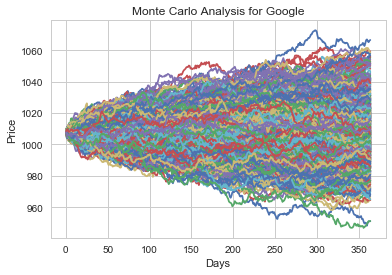

In [63]:
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

In [57]:
mu

0.0001626661585764344

In [58]:
sigma

0.018167342983134084

In [59]:
dt

0.0027397260273972603

# To be continued 